In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Lectura del dataset

In [32]:
client_data=pd.read_csv('all-client_resume_iteration.csv')
client_data

,query,Iteration,--base Juliet Java Total Energy (J),--base Total Energy (J),--base Average Energy (J),--base Total Power (W),--base Average Power (W),--base Runtime,--base Read Count,--base Postgres CPU %,...,compression Postgres Read Count,index-and-compression Juliet Java Total Energy (J),index-and-compression Total Energy (J),index-and-compression Average Energy (J),index-and-compression Total Power (W),index-and-compression Average Power (W),index-and-compression Runtime,index-and-compression Read Count,index-and-compression Postgres CPU %,index-and-compression Postgres Read Count
0,1,1,21.7749,13.1298,0.273538,0.5827,0.012140,41589354580,112.0,71.76,...,38870.99,21.0338,13.3582,0.333955,1.6220,0.040550,30846643180,112.0,99.23,107271.67
1,1,2,23.6804,12.2016,0.271147,0.1727,0.003838,25841325520,112.0,69.63,...,40560.68,23.4381,13.9155,0.296074,1.4173,0.030155,21187078549,112.0,0.00,0.00
2,1,3,25.1116,12.9996,0.259992,0.4585,0.009170,23625756545,112.0,71.75,...,40228.22,21.8224,12.7353,0.283007,1.1478,0.025507,20159461880,112.0,0.00,0.00
3,1,4,25.0316,10.6466,0.171719,0.8107,0.013076,24497828758,112.0,60.05,...,36864.27,25.2161,10.8845,0.253128,0.9846,0.022898,21192134977,112.0,0.00,0.00
4,1,5,20.0130,12.5769,0.292486,0.9260,0.021535,24209762836,112.0,71.22,...,39700.70,20.5399,13.3803,0.290876,0.7410,0.016109,20218967530,112.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,22,26,-2404.4300,12.0934,0.262900,0.6484,0.014096,360435951079,112.0,0.00,...,27.05,17.7020,26.0349,13.017450,26.0349,13.017450,8286380797,112.0,0.00,0.00
656,22,27,111.3760,12.9474,0.323685,0.6568,0.016420,339360821140,112.0,0.00,...,36.52,16.8539,31.9875,15.993750,31.9875,15.993750,8371370236,112.0,0.00,0.00
657,22,28,127.1810,12.7200,0.295814,0.4454,0.010358,403758743976,112.0,8.29,...,244256.94,16.0522,34.4829,0.313481,27.6328,0.251207,8283836734,112.0,0.00,0.00
658,22,29,112.3590,11.6654,0.271288,0.2586,0.006014,359958773648,112.0,0.00,...,34.83,16.3233,30.3229,7.580725,29.7637,7.440925,8291483814,112.0,0.00,0.00


# Descripción del dataset

El dataset a utilizar es all- client_resume_iteration.
Este dataset contiene los datos recopilados por un estudio que muestran los resultados del consumo energetico de distintas optimizaciones de consultas realizadas a una base de datos.


El dataset cuenta con 25.080 datos distribuidos en 660 filas y 38 columnas

In [19]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 38 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   query                                               660 non-null    int64  
 1   Iteration                                           660 non-null    int64  
 2   --base Juliet Java Total Energy (J)                 660 non-null    float64
 3   --base Total Energy (J)                             660 non-null    float64
 4   --base Average Energy (J)                           660 non-null    float64
 5   --base Total Power (W)                              660 non-null    float64
 6   --base Average Power (W)                            660 non-null    float64
 7   --base Runtime                                      660 non-null    int64  
 8   --base Read Count                                   660 non-null    float64
 9  

In [20]:
#Para calcular valores nulos
client_data.isna().sum().sum()

0

Como se puede observar, el dataset cuenta con 38 variables, cuyos datos son todos numericos variando del tipo int64(enteros de 64 bits) y float64(flotantes de 64 bits). No existen valores nulos en la tabla

In [21]:
client_data[['--base Juliet Java Total Energy (J)','index Juliet Java Total Energy (J)']].describe()

,--base Juliet Java Total Energy (J),index Juliet Java Total Energy (J)
count,660.000000,660.000000
mean,15.252841,18.584343
std,215.304286,2.964933
min,-4916.650000,12.232200
25%,18.170550,16.371525
50%,19.980600,18.308250
75%,24.051675,20.555300
max,134.066000,29.785200


# Analisis Univariado
Para hacer este analisis se utilizaran las variables '--base Juliet Java Total Energy (J)' y 'index Juliet Java Total Energy (J)'.
Se obtendran las medidas de tendencia central y de dispersion.
Se hara un analisis de los datos y se revisara si hay que hacer cambios en el dataset para tener una lectura mas clara de estos.

# Inicio de analisis univariado

In [22]:
#Cálculo de las medidas de tendencia central y las dispersioón para '--base Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':")
print(f"Media: {client_data['--base Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {client_data['--base Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {client_data['--base Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {client_data['--base Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {client_data['--base Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {client_data['--base Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {client_data['--base Juliet Java Total Energy (J)'].max()}\n")


#Cálculo de las medidas de tendencia central y las dispersioón para 'index Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':")
print(f"Media: {client_data['index Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {client_data['index Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {client_data['index Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {client_data['index Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {client_data['index Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {client_data['index Juliet Java Total Energy (J)'].max()}\n")


Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':
Media: 15.252840909090912
Mediana: 19.980600000000003
Desviación Estándar: 215.304285592657
Varianza: 46355.93539456441
Rango: 125.94999999999999
Mínimo: -4916.65
Máximo: 134.066

Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':
Media: 18.584343030303028
Mediana: 18.30825
Desviación Estándar: 2.964932688163141
Varianza: 8.790825845338308
Rango: 21.669199999999993
Mínimo: 12.2322
Máximo: 29.7852



In [23]:
print("Valores faltantes en el dataset del cliente:")
print(client_data.isnull().sum().sum())

Valores faltantes en el dataset del cliente:
0


No hay datos nulos.
Como podemmos observar, en la variable '-- base Juliet Java Total Energy (J)' hay valores negativos y muy altos. Para tratar estos datos, ya que no se pueden eliminar al pertenecer todos a la query 22, se imputaran los datos para hacer mas clara la lectura de los datos.
Para hacer esto se cambiara todos los datos de la variable '--base Juliet Java Total Energy (j)' por la mediana de la query completa.

In [24]:
#Se immputan los datos de la query 22
baseJ_noneg=client_data.copy()
mediana = baseJ_noneg[baseJ_noneg['query'] == 22]['--base Juliet Java Total Energy (J)'].median()
baseJ_noneg.loc[(baseJ_noneg['query'] == 22) , '--base Juliet Java Total Energy (J)'] = mediana



In [25]:
#Se crea un subconjunto limpio con las variables a revisar
subset_clean= baseJ_noneg[['--base Juliet Java Total Energy (J)','index Juliet Java Total Energy (J)']]

In [26]:
#Cálculo de las medidas de tendencia central y las dispersioón para '--base Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':")
print(f"Media: {subset_clean['--base Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {subset_clean['--base Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {subset_clean['--base Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {subset_clean['--base Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {subset_clean['--base Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {subset_clean['--base Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {subset_clean['--base Juliet Java Total Energy (J)'].max()}\n")


#Cálculo de las medidas de tendencia central y las dispersioón para 'index Juliet Java Total Energy (J)'
print("Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':")
print(f"Media: {subset_clean['index Juliet Java Total Energy (J)'].mean()}")
print(f"Mediana: {subset_clean['index Juliet Java Total Energy (J)'].median()}")
print(f"Desviación Estándar: {subset_clean['index Juliet Java Total Energy (J)'].std()}")
print(f"Varianza: {subset_clean['index Juliet Java Total Energy (J)'].var()}")
print(f"Rango: {subset_clean['index Juliet Java Total Energy (J)'].max() - client_data['index Juliet Java Total Energy (J)'].min()}")
print(f"Mínimo: {subset_clean['index Juliet Java Total Energy (J)'].min()}")
print(f"Máximo: {subset_clean['index Juliet Java Total Energy (J)'].max()}\n")

Medidas de tendencia central y dispersión para '--base Juliet Java Total Energy (J)':
Media: 26.581195454545455
Mediana: 20.0124
Desviación Estándar: 20.92477948975522
Varianza: 437.84639669488075
Rango: 108.5025
Mínimo: 12.8693
Máximo: 116.6185

Medidas de tendencia central y dispersión para 'index Juliet Java Total Energy (J)':
Media: 18.584343030303028
Mediana: 18.30825
Desviación Estándar: 2.964932688163141
Varianza: 8.790825845338308
Rango: 21.669199999999993
Mínimo: 12.2322
Máximo: 29.7852



# Comparación de los Resultados:
**Media:**
*   --base Juliet Java Total Energy (J): 26.58 J
*   index Juliet Java Total Energy (J): 18.58 J

La --base tiene una media de consumo de energía significativamente mayor que la indexación.

**Mediana:**

*   --base Juliet Java Total Energy (J): 20.01 J
*   index Juliet Java Total Energy (J): 18.30 J

Similar a la media, la --base tiene una mediana más alta, lo que indica un mayor consumo en la mayoría de los casos.

**Desviación Estándar y Varianza:**


*   --base Juliet Java Total Energy (J): Desviación Estándar 20.92 J, Varianza 437.84 J²
*   index Juliet Java Total Energy (J): Desviación Estándar 2.96 J, Varianza 8.79 J²

Aquí vemos que los valores de --base están mucho más dispersos. Esto sugiere que el consumo de energía --base varía bastante, mientras que el consumo con indexación es más consistente.

**Rango:**

* --base Juliet Java Total Energy (J): 108.50 J
* index Juliet Java Total Energy (J): 21.66 J

El rango de --base es mucho mas amplio, lo que puede indicar que tiene valores mas extremos.

**Mínimo y Máximo:**

* --base Juliet Java Total Energy (J): Mínimo 12.86 J, Máximo 116.61 J
* index Juliet Java Total Energy (J): Mínimo 12.23 J, Máximo 29.78 J

Aunque ambos conjuntos de datos tienen valores mínimos parecidos, el máximo en la --base es significativamente mayor, lo que indica la presencia de algunos outliers o casos donde el consumo energético fue extremadamente alto.


**Conclusiones de la Comparación:**

* El consumo de energia en --base es mayor en promedio a index, lo que varia mas en funcion de la query que se esta consultando.

* El consumo con indexación es más bajo y más constante, lo que lo convierte en una estrategia de optimización más predecible en términos de consumo energético.

* La varianza y la desviación estándar de --base son mucho más altas, lo que sugiere ciertas consultas estan consumiendo mas energia en comparacion con la indexacion.
* El rango en --base es mucho mas amplio, lo que indica que hay valores extremos que estan subiendo la media de los datos.

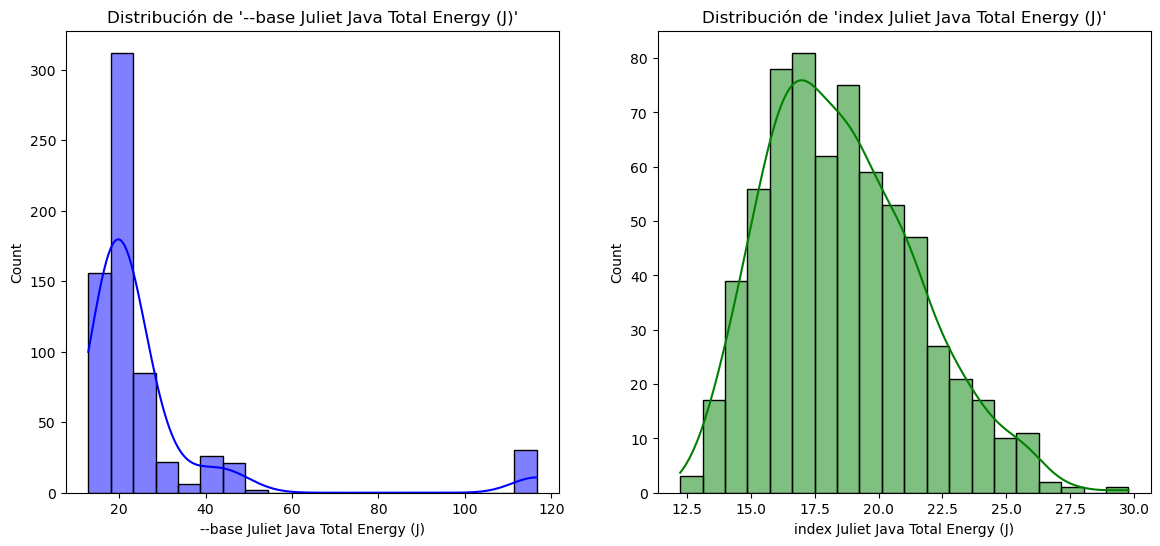

In [27]:
# Establecer el tamaño de las figuras
plt.figure(figsize=(14,6))

# Histograma para 'index Juliet Java Total Energy (J)'
plt.subplot(1, 2, 1)
sns.histplot(subset_clean['--base Juliet Java Total Energy (J)'], bins=20, kde=True, color='blue')
plt.title("Distribución de '--base Juliet Java Total Energy (J)'")

# Histograma para '--base Juliet Java Total Energy (J)'
plt.subplot(1, 2, 2)
sns.histplot(subset_clean['index Juliet Java Total Energy (J)'], bins=20, kde=True, color='green')
plt.title("Distribución de 'index Juliet Java Total Energy (J)'")

# Mostrar los histogramas
plt.show()


## Analisis de los Histogramas
**Distribucion de --base Juliet Java Total Energy (j):**
*Distribucion marcada a la izquierda: La gran parte de los datos estan concentrados en valores mas bajos, entre 0 y 50 aproximadamente.
*Algunos valores mas altos: Existen valores superior a los 100(J), al hacer un analisis pudimos corroborar que son los datos de la consulta 22, la cual parece que tiene un mayor consumo de energia que las otras consultas.
**Distribucion de index Juliet Java Total Energy(J):**
*Distribucion mas centralizada: Segun podemos ver en el grafico, los datos se agrupan de una forma parecida a la distribucion normal, por lo que ciertas tecnicas estadisticas como las pruebas parametricas y otras.
**Conclusion Preliminar**
*--base Juliet Java Total Energy (J): --base consume baja energia en la mayoria de los casos, excepto la consulta 22 que gasta mucha mas energia.
*index Juliet Java Total Energy (J): index tiene un  consumo de energia mas variado pero todas las consultas estan cercanas a las medidas de tendencias central.

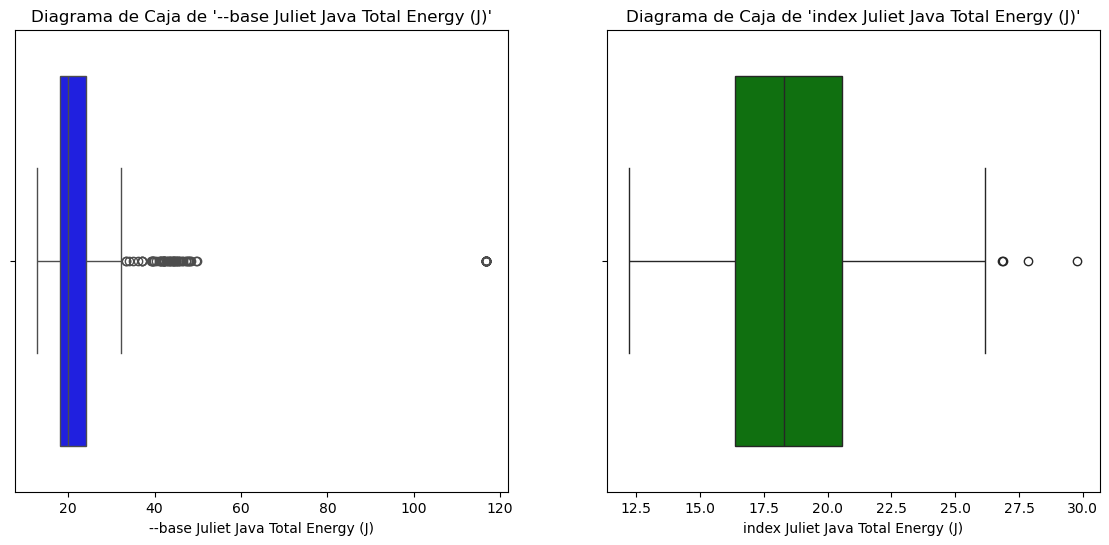

In [28]:
# Crear diagramas de caja (boxplots) para ver los outliers y la dispersión
plt.figure(figsize=(14,6))

# Diagrama de caja para 'index Juliet Java Total Energy (J)'
plt.subplot(1, 2, 1)
sns.boxplot(x=subset_clean['--base Juliet Java Total Energy (J)'], color='blue')
plt.title("Diagrama de Caja de '--base Juliet Java Total Energy (J)'")

# Diagrama de caja para '--base Juliet Java Total Energy (J)'
plt.subplot(1, 2, 2)
sns.boxplot(x=subset_clean['index Juliet Java Total Energy (J)'], color='green')
plt.title("Diagrama de Caja de 'index Juliet Java Total Energy (J)'")

# Mostrar los boxplots
plt.show()

##Analisis de los Diagramas de Cajas
*Diagrama de caja para --base Juliet Java Total Energy (J):




*Diagrama de caja para index Juliet Java Total Energy (J)

# Análisis Bivariado

## Hipótesis:

* "Existe una correlación significativa entre el consumo de energía sin optimización (--base Juliet Java Total Energy (J)) y el consumo de energía con optimización mediante indexación (index Juliet Java Total Energy (J)). Si el consumo energético en el estado base es alto, se espera que el consumo con optimización de indexación también sea alto; de manera similar, si hay una correlación negativa, un menor consumo en el estado base implicaría un menor consumo con la optimización de indexación."

In [35]:
# Seleccionamos las dos variables para análisis del dataset del servidor
index_energy = client_data['index Juliet Java Total Energy (J)']
base_energy = client_data['--base Juliet Java Total Energy (J)']
correlation, p_value = pearsonr(index_energy, base_energy)
print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

Coeficiente de correlación de Pearson: 0.02468961526610112
Valor p: 0.5266148819031848


   index Juliet Java Total Energy (J)  --base Juliet Java Total Energy (J)
0                            0.144179                             0.030315
1                            1.558133                             0.039172
2                            0.201998                             0.045825
3                            0.693444                             0.045453
4                            0.282229                             0.022126
Coeficiente de correlación de Pearson (normalizado): 0.024689615266101125
Valor p: 0.5266148819031848


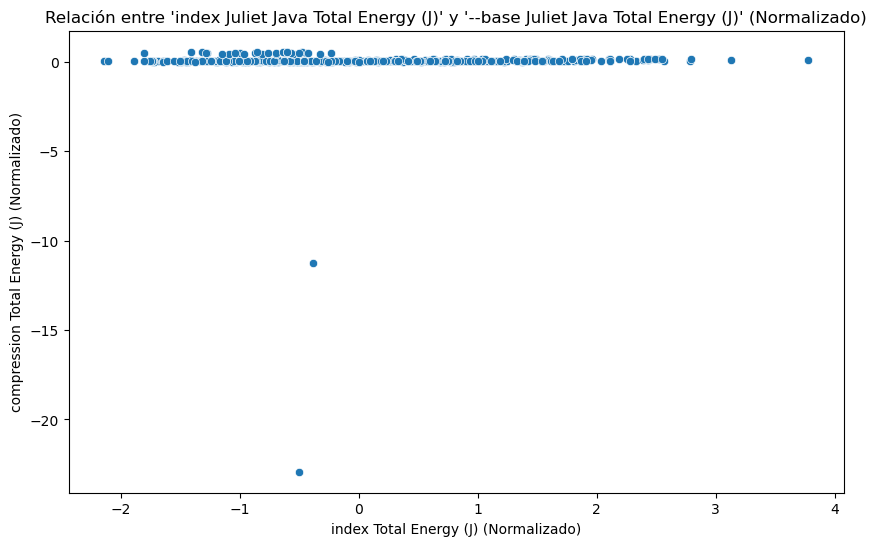

In [36]:
# Crear el objeto scaler
scaler = StandardScaler()

# Normalizamos las variables
client_data[['index Juliet Java Total Energy (J)', '--base Juliet Java Total Energy (J)']] = scaler.fit_transform(
    client_data[['index Juliet Java Total Energy (J)', '--base Juliet Java Total Energy (J)']])

# Revisar las primeras filas después de la normalización
print(client_data[['index Juliet Java Total Energy (J)', '--base Juliet Java Total Energy (J)']].head())

# Repetimos el cálculo de Pearson y el gráfico
index_energy = client_data['index Juliet Java Total Energy (J)']
base_energy = client_data['--base Juliet Java Total Energy (J)']

# Cálculo del coeficiente de correlación de Pearson después de la normalización
correlation, p_value = pearsonr(index_energy, base_energy)
print(f"Coeficiente de correlación de Pearson (normalizado): {correlation}")
print(f"Valor p: {p_value}")

# Visualización con un gráfico de dispersión después de la normalización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=index_energy, y=base_energy)
plt.title("Relación entre 'index Juliet Java Total Energy (J)' y '--base Juliet Java Total Energy (J)' (Normalizado)")
plt.xlabel("index Total Energy (J) (Normalizado)")
plt.ylabel("base Total Energy (J) (Normalizado)")
plt.show()

In [37]:
# Definir un límite superior razonable para la variable '--base Juliet Java Total Energy (J)'
limite_superior = 100000  # El límite puede ajustarse según sea necesario

# Filtrar el subconjunto limpio para eliminar el outlier
subset_clean_filtered = subset_clean[subset_clean['--base Juliet Java Total Energy (J)'] < limite_superior]

# Verificación del subconjunto después de eliminar el outlier
print("Descripción del subconjunto limpio sin outliers:")
print(subset_clean_filtered.describe())

Descripción del subconjunto limpio sin outliers:
       --base Juliet Java Total Energy (J)  index Juliet Java Total Energy (J)
count                           660.000000                          660.000000
mean                             26.581195                           18.584343
std                              20.924779                            2.964933
min                              12.869300                           12.232200
25%                              18.205800                           16.371525
50%                              20.012400                           18.308250
75%                              24.095825                           20.555300
max                             116.618500                           29.785200


Coeficiente de correlación de Pearson (sin outlier): 0.004151857861910816
Valor p (sin outlier): 0.9152162568314987


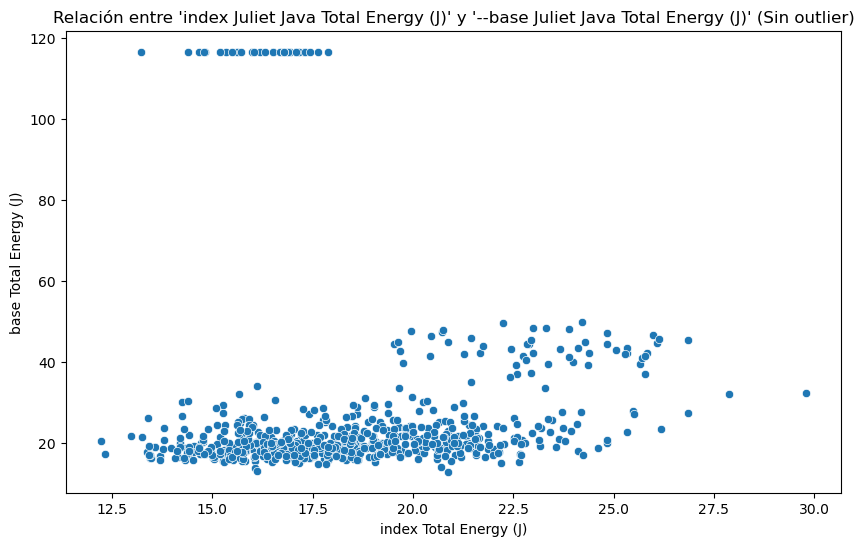

In [39]:
# Definir las variables del subconjunto limpio sin el outlier
index_energy_clean = subset_clean_filtered['index Juliet Java Total Energy (J)']
base_energy_clean = subset_clean_filtered['--base Juliet Java Total Energy (J)']

# Cálculo del coeficiente de correlación de Pearson en el subconjunto limpio
correlation_clean, p_value_clean = pearsonr(index_energy_clean, base_energy_clean)
print(f"Coeficiente de correlación de Pearson (sin outlier): {correlation_clean}")
print(f"Valor p (sin outlier): {p_value_clean}")

# Visualización con un gráfico de dispersión después de eliminar el outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(x=index_energy_clean, y=base_energy_clean)
plt.title("Relación entre 'index Juliet Java Total Energy (J)' y '--base Juliet Java Total Energy (J)' (Sin outlier)")
plt.xlabel("index Total Energy (J)")
plt.ylabel("base Total Energy (J)")
plt.show()

Ecuación de la regresión lineal: y = 0.0293x + 26.0366


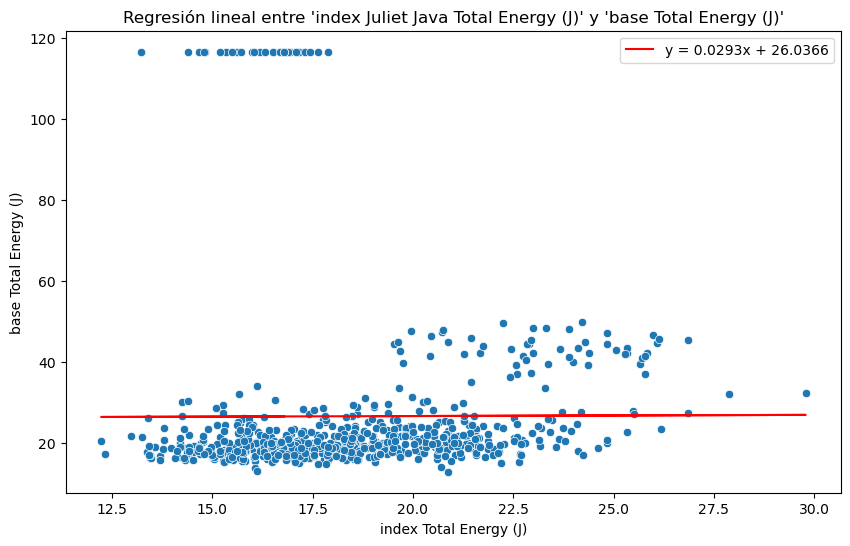

In [42]:
X = subset_clean_filtered['index Juliet Java Total Energy (J)'].values.reshape(-1, 1)
y = subset_clean_filtered['--base Juliet Java Total Energy (J)'].values.reshape(-1, 1)

# Crear el modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener el coeficiente de la recta (pendiente) y la intersección
slope = reg.coef_[0]
intercept = reg.intercept_
print(f"Ecuación de la regresión lineal: y = {slope[0]:.4f}x + {intercept[0]:.4f}")

# Predicciones de la regresión para visualizar la línea ajustada
y_pred = reg.predict(X)

# Visualización del gráfico de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subset_clean_filtered['index Juliet Java Total Energy (J)'], y=subset_clean_filtered['--base Juliet Java Total Energy (J)'])
plt.plot(subset_clean_filtered['index Juliet Java Total Energy (J)'], y_pred, color='red', label=f"y = {slope[0]:.4f}x + {intercept[0]:.4f}")
plt.title("Regresión lineal entre 'index Juliet Java Total Energy (J)' y 'base Total Energy (J)'")
plt.xlabel("index Total Energy (J)")
plt.ylabel("base Total Energy (J)")
plt.legend()
plt.show()